# Compute statistics from card draws

## Intializations

We load any library we need for analysis. `print_function` enables to backport print functions from Python 3.x.

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Create cards

52 card deck, from ace to ten with jack, queen and king in spades, hearts, diamonds and clubs.
Ace has value 1, 2-10 have respective values from 2 to 10. Each face card has value 10.


In [2]:
def createDeck():
    """
    Create deck of cards.
    
    Returns a list of tuples with:
    - card string
    - card suit
    - card value
    """
    values = {'ace': 1, 'J': 10, 'Q': 10, 'K': 10}
    deck = [ ]
    for suit in ['spades', 'hearts', 'diamonds', 'clubs']:
        for card in ['ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']:
            try:
                value = int(card)
            except ValueError:
                value = values[card]
            deck.append((suit, card, value))
    return deck

Let's check the deck:

In [3]:
deck = createDeck()
print(len(deck))
for card in deck:
    print(card)

52
('spades', 'ace', 1)
('spades', '2', 2)
('spades', '3', 3)
('spades', '4', 4)
('spades', '5', 5)
('spades', '6', 6)
('spades', '7', 7)
('spades', '8', 8)
('spades', '9', 9)
('spades', '10', 10)
('spades', 'J', 10)
('spades', 'Q', 10)
('spades', 'K', 10)
('hearts', 'ace', 1)
('hearts', '2', 2)
('hearts', '3', 3)
('hearts', '4', 4)
('hearts', '5', 5)
('hearts', '6', 6)
('hearts', '7', 7)
('hearts', '8', 8)
('hearts', '9', 9)
('hearts', '10', 10)
('hearts', 'J', 10)
('hearts', 'Q', 10)
('hearts', 'K', 10)
('diamonds', 'ace', 1)
('diamonds', '2', 2)
('diamonds', '3', 3)
('diamonds', '4', 4)
('diamonds', '5', 5)
('diamonds', '6', 6)
('diamonds', '7', 7)
('diamonds', '8', 8)
('diamonds', '9', 9)
('diamonds', '10', 10)
('diamonds', 'J', 10)
('diamonds', 'Q', 10)
('diamonds', 'K', 10)
('clubs', 'ace', 1)
('clubs', '2', 2)
('clubs', '3', 3)
('clubs', '4', 4)
('clubs', '5', 5)
('clubs', '6', 6)
('clubs', '7', 7)
('clubs', '8', 8)
('clubs', '9', 9)
('clubs', '10', 10)
('clubs', 'J', 10)
('club

## Distribution of card values

We first create a numpy array with all card values, then we draw a histogram of distribution of cards.

In [4]:
values = np.array([card[2] for card in deck], dtype=np.int32)
print(values)

[ 1  2  3  4  5  6  7  8  9 10 10 10 10  1  2  3  4  5  6  7  8  9 10 10 10
 10  1  2  3  4  5  6  7  8  9 10 10 10 10  1  2  3  4  5  6  7  8  9 10 10
 10 10]


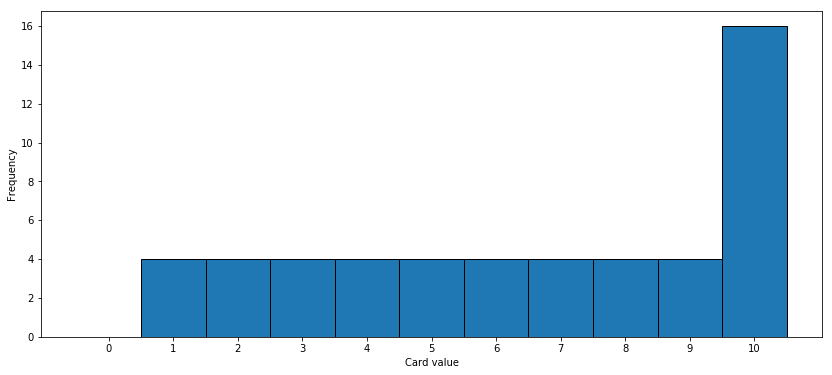

In [5]:
figure = plt.figure(figsize=(14, 6))
axes = figure.add_subplot(111)
bins = np.arange(values.max() + 2) - 0.5
axes.hist(values, bins=bins, edgecolor='black', linewidth=1.0)
axes.set_xticks(range(0, 11))
axes.set_xlabel('Card value')
axes.set_ylabel('Frequency')
plt.show()

We can see that the distribution is a negative skew distribution.

Now we calculate mean, median and standard deviation. Numpy has some built-in functions:

In [6]:
mean = np.mean(values)
median = np.median(values)
stddev = np.std(values)
print ("mean = %.2f" % mean)
print ("median = %.2f" % median)
print ("stddev = %.2f" % stddev)

mean = 6.54
median = 7.00
stddev = 3.15


## Sampling distribution

We are now going to take few samples of n cards and calculate the sum of values for each sample. You can adjust *n* (sample size) and *m* number of samples in the cell below:

In [7]:
n = 3
m = 300

We use numpy to generate random numbers. We set a value for seed such as results are reproductible. We then creates samples as specified by n and m values and calculate sum of values for each sample:

In [8]:
np.random.seed(1234)
samples = np.zeros((m,), dtype=np.int32)
for i in xrange(m):
    #Both lines are equivalent
    #samples[i] = np.random.permutation(values)[:3].sum()
    samples[i] = np.random.choice(values, n, replace=False).sum()
    
print("Min sum of values: ", samples.min())
print("Max sum of values: ", samples.max())

Min sum of values:  5
Max sum of values:  30


We plot distribution of the samples sum:

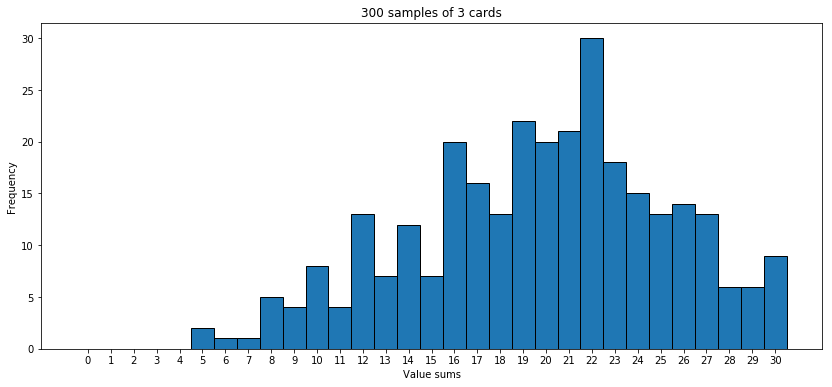

In [9]:
figure = plt.figure(figsize=(14, 6))
axes = figure.add_subplot(111)
bins = np.arange(samples.max() + 2) - 0.5
axes.hist(samples, bins=bins, edgecolor='black', linewidth=1.0)
axes.set_xticks(range(0, int(np.ceil(samples.max())) + 1))
axes.set_xlabel('Value sums')
axes.set_ylabel('Frequency')
axes.set_title('%i samples of %i cards' % (m, n))
plt.show()

The distribution loks like a normal distribution.
We can calculate mean, median and standard error:

In [10]:
mean_sum = np.mean(samples)
median_sum = np.median(samples)
se_sum = np.std(samples)
print ("mean_sum = %.2f" % mean_sum)
print ("median_sum = %.2f" % median_sum)
print ("se_sum = %.2f" % se_sum)

mean_sum = 19.71
median_sum = 20.00
se_sum = 5.54


With sums of samples, the central limit theorems says that mean of samples sum shall be:
\begin{equation*}
\bar{X} = n \mu
\end{equation*}

And that standard error should be:
\begin{equation*}
SE = \sigma \sqrt{n}
\end{equation*}

And finally that the distribution tends to look like a normal distribution.

This is something we can check:

In [11]:
print(n*6.54)
print(np.sqrt(n)*3.15)

19.62
5.45596004384


These numbers are pretty close !

We can also do the same with the sample averages:

In [12]:
samples_average = samples / n
mean_average = np.mean(samples_average)
median_average = np.median(samples_average)
se_average = np.std(samples_average)
print ("mean_average = %.2f" % mean)
print ("median_average = %.2f" % median)
print ("se_average = %.2f" % se)
figure = plt.figure(figsize=(14, 6))
axes = figure.add_subplot(111)
bins = np.arange(samples_average.max() + 2) - 0.5
axes.hist(samples_average, bins=bins, edgecolor='black', linewidth=1.0)
axes.set_xticks(range(0, int(np.ceil(samples_average.max())) + 1))
axes.set_xlabel('Value average')
axes.set_ylabel('Frequency')
axes.set_title('%i samples of %i cards' % (m, n))
plt.show()

mean_average = 6.54
median_average = 7.00


NameError: name 'se' is not defined

The distribution also looks like a normal distribution.

The central limit theorem says that standard error of samples mean shall be:
\begin{equation*}
SE = \frac{\sigma}{\sqrt{n}}
\end{equation*}

while mean of samples mean is very close to population mean.

In [ ]:
print(stddev/np.sqrt(n))

The expected value of standard error is quite close from the standard deviation of the population divided by the square root of n.
The mean of samples average is also quite close from the population mean.

## Normalizing distribution

In this section we will normalize the sample distributions using z-scores. 

\begin{equation*}
Zscore = \frac{(x - \mu)}{\sigma}
\end{equation*}

We will do this for samples sum:

In [ ]:
zscores = (samples - mean_sum) / se_sum
print(zscores.min())
print(zscores.max())

We can plot the distribution of z-scores:

In [ ]:
figure = plt.figure(figsize=(14, 6))
axes = figure.add_subplot(111)
bins = np.arange(zscores.min(), zscores.max() + 1., 0.5) - 0.25
axes.hist(zscores, bins=bins, edgecolor='black', linewidth=1.0)
axes.set_xticks(np.arange(zscores.min(), zscores.max() + 1., 0.5))
axes.set_xlabel('z-score')
axes.set_ylabel('Frequency')
axes.set_title('%i samples of %i cards' % (m, n))
plt.show()

We can calculate the probability of a certain z-score using a z-score table (such as http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf) assuming that we have a normal distribution.

For example, the range of 90% of draws may be calculated this way:

The probability of 0.9 is associated with a z-score of 1.29. That means that 90% of samples have a z-score of 1.29 or less. The sum associated to this z-score is:

In [ ]:
sum_90 = 1.29 * se_sum + mean_sum
print(sum_90)

So 90% of draws would have a sum between 3 and 26.86.

The probability of getting a sum of at least 20 can be calculated from the probability of having less than 20. A sum of 20 is associated to a z-score of:

In [ ]:
zscore_20 = (20 - mean_sum) / se_sum
print(zscore_20)

The probability of having a z-score of 0.05 or less is 0.5199, so the probability of having more is:

In [ ]:
p_20 = 1. - 0.5199
print(p_20)

We have 48% of chances to get a sum of 20 or more.